In [168]:
import math
import pandas_datareader as web 
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import datetime as dt
import matplotlib.pyplot as plt 

[[ 8.92517]
 [ 8.72615]
 [ 8.67882]
 [ 8.76397]
 [ 8.76397]
 [ 8.77357]
 [ 8.76397]
 [ 8.75466]
 [ 8.8018 ]
 [ 8.70713]
 [ 8.68822]
 [ 8.67882]
 [ 8.72615]
 [ 8.67882]
 [ 8.65991]
 [ 8.52724]
 [ 8.42288]
 [ 8.49871]
 [ 8.53722]
 [ 8.51802]
 [ 8.49871]
 [ 8.65285]
 [ 8.8456 ]
 [ 8.00731]
 [ 7.94949]
 [ 7.81456]
 [ 7.76645]
 [ 7.80496]
 [ 7.93988]
 [ 7.94949]
 [ 7.80496]
 [ 7.76645]
 [ 7.70864]
 [ 7.73754]
 [ 7.60261]
 [ 7.29434]
 [ 6.96667]
 [ 6.94737]
 [ 6.71612]
 [ 6.70651]
 [ 6.93776]
 [ 6.71612]
 [ 6.82214]
 [ 6.49446]
 [ 6.25361]
 [ 5.68508]
 [ 6.03186]
 [ 5.68508]
 [ 5.15516]
 [ 5.42492]
 [ 4.82749]
 [ 4.82749]
 [ 4.33617]
 [ 4.30727]
 [ 4.17234]
 [ 3.86397]
 [ 4.76967]
 [ 5.19367]
 [ 5.05884]
 [ 5.00093]
 [ 4.8468 ]
 [ 4.65405]
 [ 4.23975]
 [ 4.20124]
 [ 4.08562]
 [ 4.36498]
 [ 4.53842]
 [ 4.8468 ]
 [ 5.17446]
 [ 4.97192]
 [ 5.09735]
 [ 4.8468 ]
 [ 4.76017]
 [ 4.93341]
 [ 4.79868]
 [ 4.59624]
 [ 4.59624]
 [ 4.71187]
 [ 4.69256]
 [ 4.98173]
 [ 5.18397]
 [ 5.06834]
 [ 4.9046 ]
 [ 4

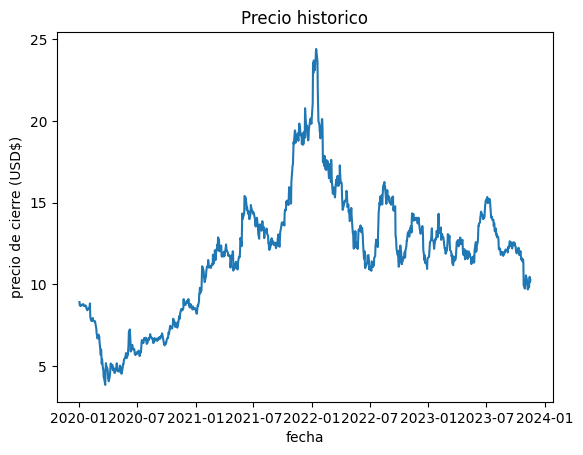

In [169]:
#conseguir la data
df = web.DataReader('F', 'stooq', dt.datetime(2020,1,1), dt.date.today())
#print(df)
data = df.filter(['Close'])
#print(data)
dataSet = data.values
dataTrainLen = math.ceil(len(dataSet) * 0.8)
dataSet = np.flip(dataSet)
print(dataSet)

plt.title('Precio historico')
plt.plot(data)
plt.xlabel("fecha")
plt.ylabel("precio de cierre (USD$)")
plt.show()

In [170]:
#normalizar la data 
scaler = MinMaxScaler(feature_range=(0,1))
dataNorm = scaler.fit_transform(dataSet)

print(dataNorm)

[[0.24652427]
 [0.23683027]
 [0.23452489]
 [0.23867244]
 [0.23867244]
 [0.23914004]
 [0.23867244]
 [0.23821896]
 [0.24051508]
 [0.23590384]
 [0.23498275]
 [0.23452489]
 [0.23683027]
 [0.23452489]
 [0.23360381]
 [0.22714163]
 [0.2220584 ]
 [0.22575198]
 [0.22762775]
 [0.22669254]
 [0.22575198]
 [0.23325993]
 [0.24264852]
 [0.20181654]
 [0.19900021]
 [0.19242795]
 [0.19008457]
 [0.19196034]
 [0.19853212]
 [0.19900021]
 [0.19196034]
 [0.19008457]
 [0.18726873]
 [0.18867641]
 [0.18210415]
 [0.16708873]
 [0.15112836]
 [0.15018828]
 [0.13892441]
 [0.13845632]
 [0.14972019]
 [0.13892441]
 [0.1440885 ]
 [0.12812764]
 [0.11639616]
 [0.08870383]
 [0.10559502]
 [0.08870383]
 [0.06289214]
 [0.07603178]
 [0.04693177]
 [0.04693177]
 [0.02300023]
 [0.02159255]
 [0.01502029]
 [0.        ]
 [0.04411543]
 [0.06476791]
 [0.05820052]
 [0.0553798 ]
 [0.04787233]
 [0.03848374]
 [0.01830374]
 [0.01642797]
 [0.01079627]
 [0.02440353]
 [0.03285156]
 [0.04787233]
 [0.06383221]
 [0.05396676]
 [0.06007629]
 [0.04

In [171]:
#crear el dataset de entrenamiento 
dataTrain = dataNorm[0:dataTrainLen, :]
#separar entre X e Y dataSets
#X son las entradas e Y es la salida esperada
print(dataTrain)
x_train = []
y_train = []

for i in range(60,len(dataTrain)):
    x_train.append(dataTrain[i-60:i,0])
    y_train.append(dataTrain[i,0])



[[0.24652427]
 [0.23683027]
 [0.23452489]
 [0.23867244]
 [0.23867244]
 [0.23914004]
 [0.23867244]
 [0.23821896]
 [0.24051508]
 [0.23590384]
 [0.23498275]
 [0.23452489]
 [0.23683027]
 [0.23452489]
 [0.23360381]
 [0.22714163]
 [0.2220584 ]
 [0.22575198]
 [0.22762775]
 [0.22669254]
 [0.22575198]
 [0.23325993]
 [0.24264852]
 [0.20181654]
 [0.19900021]
 [0.19242795]
 [0.19008457]
 [0.19196034]
 [0.19853212]
 [0.19900021]
 [0.19196034]
 [0.19008457]
 [0.18726873]
 [0.18867641]
 [0.18210415]
 [0.16708873]
 [0.15112836]
 [0.15018828]
 [0.13892441]
 [0.13845632]
 [0.14972019]
 [0.13892441]
 [0.1440885 ]
 [0.12812764]
 [0.11639616]
 [0.08870383]
 [0.10559502]
 [0.08870383]
 [0.06289214]
 [0.07603178]
 [0.04693177]
 [0.04693177]
 [0.02300023]
 [0.02159255]
 [0.01502029]
 [0.        ]
 [0.04411543]
 [0.06476791]
 [0.05820052]
 [0.0553798 ]
 [0.04787233]
 [0.03848374]
 [0.01830374]
 [0.01642797]
 [0.01079627]
 [0.02440353]
 [0.03285156]
 [0.04787233]
 [0.06383221]
 [0.05396676]
 [0.06007629]
 [0.04

In [172]:
#hacerlos np.arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1] ,1))
print(x_train.shape)


(723, 60)
(723, 60, 1)


In [173]:
#construir la red LSTM 
model = Sequential() 
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [174]:
#compilar el modelo 
model.compile(optimizer= 'adam', loss= 'mean_squared_error') 


In [175]:
#train 
print(x_train.shape)
print(y_train.shape)
model.fit(x_train, y_train, batch_size= 1, epochs= 1)


(723, 60, 1)
(723,)
723/723 [==============================] - 17s 19ms/step - loss: 0.0037


In [176]:
#crea datos para test
dataTest = dataNorm[dataTrainLen-60:, :]
#separa en X y en Y 
x_test = []
y_test = dataSet[dataTrainLen:,:]

for i in range(60, len(dataTest)): 
     x_test.append(dataTest[i-60:i,0])
#X contiene los valores no contempleados en el train, e y contiene la salida esperada

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
print(x_test.shape)


(195, 60, 1)


In [177]:
#prediccion del modelo para test
prediccion = model.predict(x_test)
prediccion = scaler.inverse_transform(prediccion)

7/7 [==============================] - 1s 11ms/step


In [178]:
#calcular error del modelo (RMSE)
rmse = np.sqrt(np.mean(prediccion - y_test)**2)
print(rmse)
prediccion = np.flip(prediccion)


0.06629559267484218


C:\Users\nahue\AppData\Local\Temp\ipykernel_21792\539915286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediccion


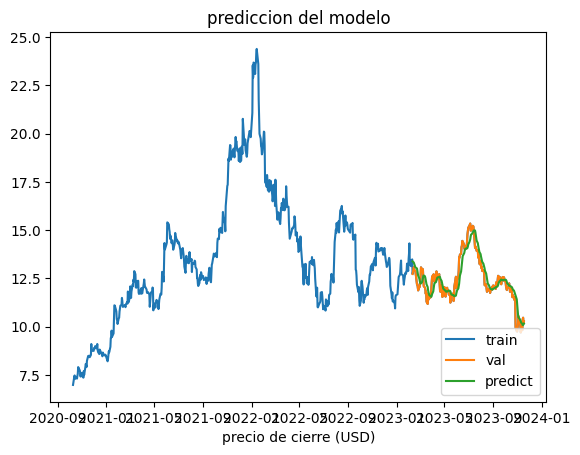

In [179]:
#grafica
train = data[:dataTrainLen]
valid = data[:len(data)-dataTrainLen]
valid['Predictions'] = prediccion
#plot
plt.title("prediccion del modelo")
plt.xlabel("modelo")
plt.xlabel("precio de cierre (USD)")
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['train', 'val', 'predict'], loc = 'lower right')
plt.show()


In [180]:
#imprimir los valores
print(valid)

            Close  Predictions
Date                          
2023-11-17  10.27    10.165039
2023-11-16  10.16    10.133924
2023-11-15  10.47    10.090336
2023-11-14  10.40    10.086807
2023-11-13   9.82    10.147643
...           ...          ...
2023-02-16  12.91    13.135834
2023-02-15  12.93    13.200849
2023-02-14  12.97    13.266212
2023-02-13  13.09    13.326385
2023-02-10  12.73    13.390203

[195 rows x 2 columns]
